## Histograms in OpenCV

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

img_path = "../resource/img/Lenna.png"
print(os.path.exists(img_path))

True


In [2]:
img = cv2.imread(img_path, 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

In [3]:
print(np.transpose(hist))

[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 4.500e+01 0.000e+00 0.000e+00
  0.000e+00 3.880e+02 0.000e+00 0.000e+00 1.171e+03 0.000e+00 0.000e+00
  0.000e+00 2.211e+03 0.000e+00 0.000e+00 3.583e+03 0.000e+00 0.000e+00
  5.472e+03 0.000e+00 0.000e+00 6.460e+03 0.000e+00 5.922e+03 0.000e+00
  0.000e+00 5.104e+03 0.000e+00 4.325e+03 0.000e+00 3.100e+03 0.000e+00
  2.479e+03 0.000e+00 2.093e+03 0.000e+00 1.730e+03 0.000e+00 1.566e+03
  0.000e+00 1.469e+03 0.000e+00 1.377e+03 0.000e+00 1.345e+03 0.000e+00
  1.335e+03 1.367e+03 0.000e+00 1.416e+03 0.000e+00 1.479e+03 1.468e+03
  0.000e+00 1.465e+03 1.438e+03 0.000e+00 1.328e+03 1.431e+03 0.

In [4]:
hist = np.bincount(img.ravel(), minlength=256)

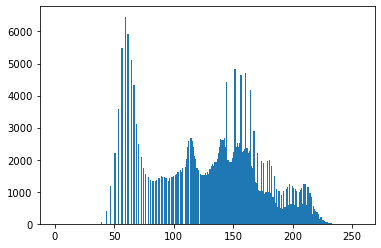

In [5]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

In [6]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

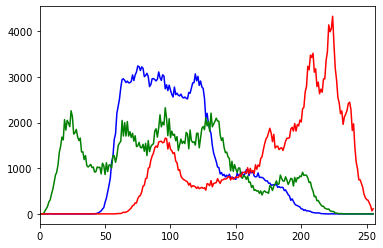

In [7]:
img = cv2.imread(img_path)
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.show()

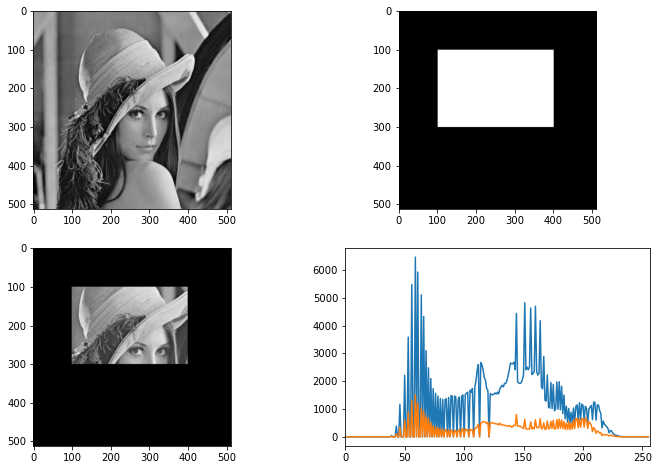

In [8]:
img = cv2.imread(img_path,0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(img, 'gray')
plt.subplot(222)
plt.imshow(mask,'gray')
plt.subplot(223)
plt.imshow(masked_img, 'gray')
plt.subplot(224)
plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

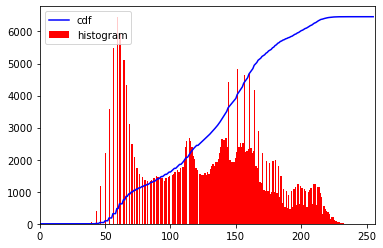

In [9]:
img = cv2.imread(img_path, 0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(("cdf", "histogram"), loc="upper left")

plt.show()

In [10]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype("uint8")

In [11]:
img2 = cdf[img]

In [12]:
img = cv2.imread(img_path, 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))

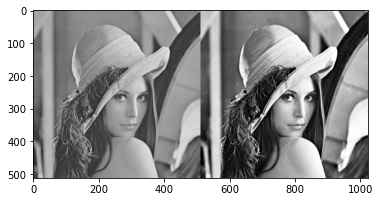

In [13]:
plt.imshow(res, "gray")
plt.show()